# Regressão Linear Simples com Dados Sintéticos

Regressão linear com um banco de dados simples.

## Objetivos de aprendizado:

  * Ajustar os seguintes [hiperparâmetros](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [taxa de aprendizagem](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * número de [épocas](https://developers.google.com/machine-learning/glossary/#epoch)
    * [tamanho do lote](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpretar diferentes tipos de [curvas de perda](https://developers.google.com/machine-learning/glossary/#loss_curve).

In [4]:
#@title Bibliotecas
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
#@title Definir as funções que constroem e treinam um modelo
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [6]:
#@title Defina as funções de plotagem
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [7]:
#@title Defina o conjunto de dados
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 449ms/step - loss: 1264.7308 - root_mean_squared_error: 35.5631
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 1246.2426 - root_mean_squared_error: 35.3022
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1232.9615 - root_mean_squared_error: 35.1136
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 1221.9193 - root_mean_squared_error: 34.9560
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 1212.1742 - root_mean_squared_error: 34.8163
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 1203.2894 - root_mean_squared_error: 34.6885
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 1195.0221 - root_mean_squared_error: 34.5691
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 1187.2212 - root_mean_squared_error: 34.4561
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


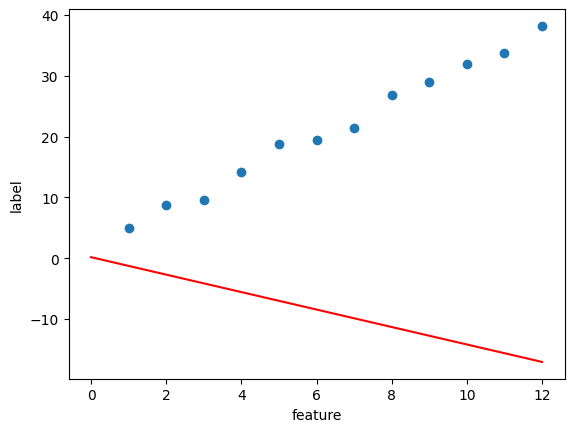

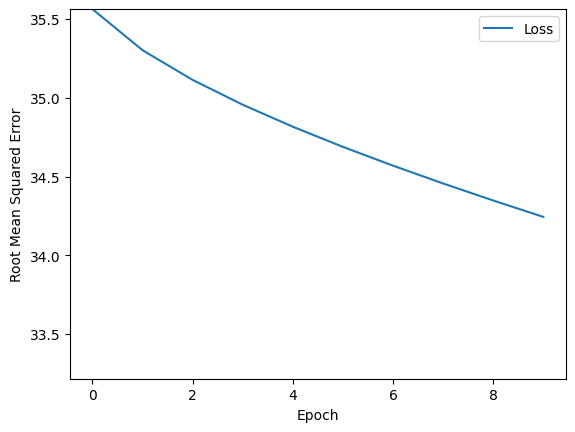

In [11]:
#@title Especifique os hiperparâmetros
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 0s 298ms/step - loss: 156.8407 - root_mean_squared_error: 12.5236
Epoch 2/450
1/1 [==============================] - 0s 11ms/step - loss: 150.3896 - root_mean_squared_error: 12.2633
Epoch 3/450
1/1 [==============================] - 0s 20ms/step - loss: 145.8408 - root_mean_squared_error: 12.0765
Epoch 4/450
1/1 [==============================] - 0s 17ms/step - loss: 142.1090 - root_mean_squared_error: 11.9209
Epoch 5/450
1/1 [==============================] - 0s 21ms/step - loss: 138.8523 - root_mean_squared_error: 11.7836
Epoch 6/450
1/1 [==============================] - 0s 13ms/step - loss: 135.9127 - root_mean_squared_error: 11.6582
Epoch 7/450
1/1 [==============================] - 0s 15ms/step - loss: 133.2023 - root_mean_squared_error: 11.5413
Epoch 8/450
1/1 [==============================] - 0s 19ms/step - loss: 130.6666 - root_mean_squared_error: 11.4310
Epoch 9/450
1/1 [==============================] - 0s 11ms/step - loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


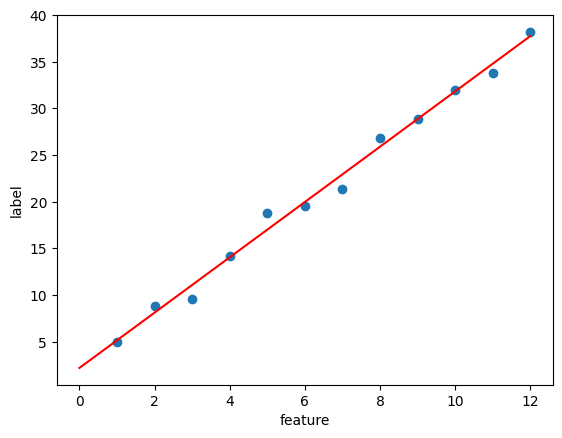

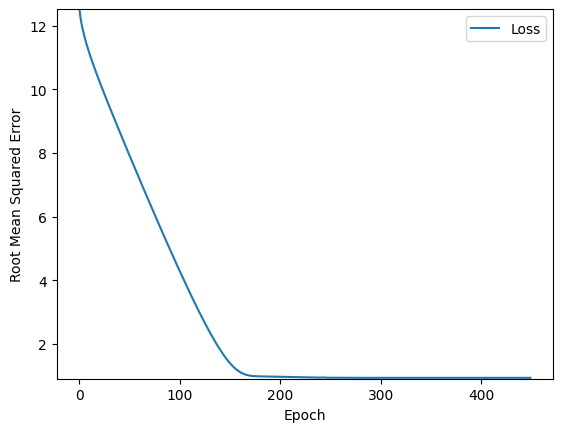

In [16]:
#@title Uma possível solução
learning_rate=0.01
epochs= 450   # Change
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 837.9836 - root_mean_squared_error: 28.9479
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 6666458.5000 - root_mean_squared_error: 2581.9485
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 829.4844 - root_mean_squared_error: 28.8008
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 4.8223 - root_mean_squared_error: 2.1960
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 1.2733 - root_mean_squared_error: 1.1284
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1996 - root_mean_squared_error: 1.0953
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1771 - root_mean_squared_error: 1.0850
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1566 - root_mean_squared_error: 1.0755
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 1.1365 - ro

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


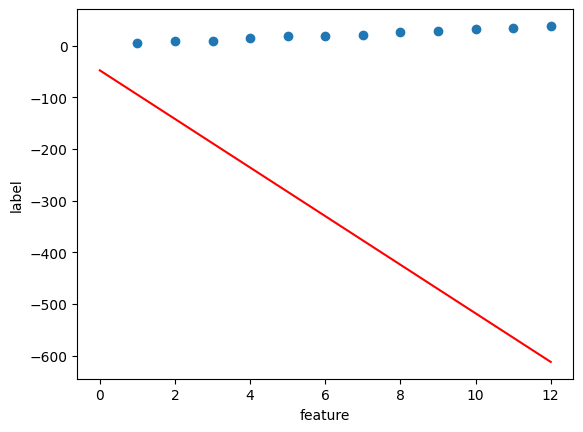

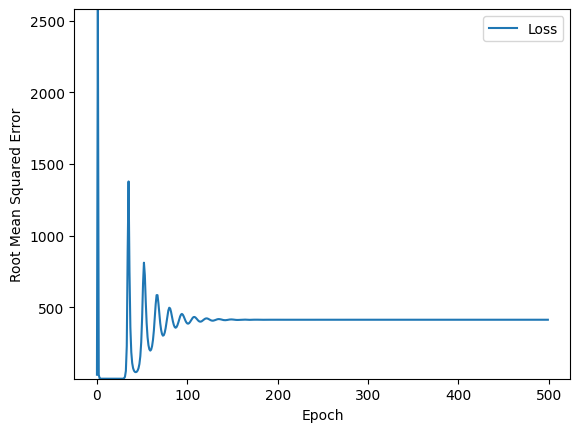

In [17]:
#@title Aumente a taxa de aprendizagem e diminua o número de épocas.
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 300ms/step - loss: 172.8596 - root_mean_squared_error: 13.1476
Epoch 2/70
1/1 [==============================] - 0s 13ms/step - loss: 90.3706 - root_mean_squared_error: 9.5063
Epoch 3/70
1/1 [==============================] - 0s 13ms/step - loss: 53.4276 - root_mean_squared_error: 7.3094
Epoch 4/70
1/1 [==============================] - 0s 12ms/step - loss: 32.7514 - root_mean_squared_error: 5.7229
Epoch 5/70
1/1 [==============================] - 0s 11ms/step - loss: 20.3130 - root_mean_squared_error: 4.5070
Epoch 6/70
1/1 [==============================] - 0s 14ms/step - loss: 12.6378 - root_mean_squared_error: 3.5550
Epoch 7/70
1/1 [==============================] - 0s 14ms/step - loss: 7.8859 - root_mean_squared_error: 2.8082
Epoch 8/70
1/1 [==============================] - 0s 12ms/step - loss: 4.9721 - root_mean_squared_error: 2.2298
Epoch 9/70
1/1 [==============================] - 0s 12ms/step - loss: 3.2178 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


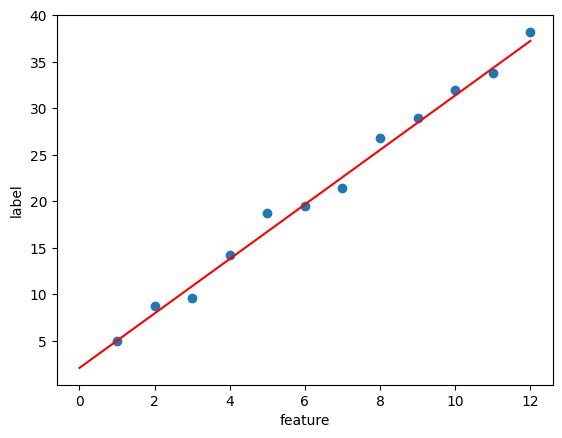

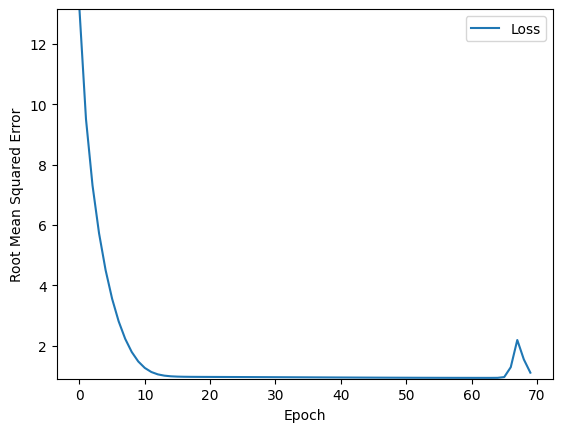

In [18]:
#@title Possível solução
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 486.7717 - root_mean_squared_error: 22.0629
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 312.8185 - root_mean_squared_error: 17.6867
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 204.6994 - root_mean_squared_error: 14.3073
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 123.6997 - root_mean_squared_error: 11.1220
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 66.6867 - root_mean_squared_error: 8.1662
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 29.1143 - root_mean_squared_error: 5.3958
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 10.2817 - root_mean_squared_error: 3.2065
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 2.7537 - root_mean_squared_error: 1.6594
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


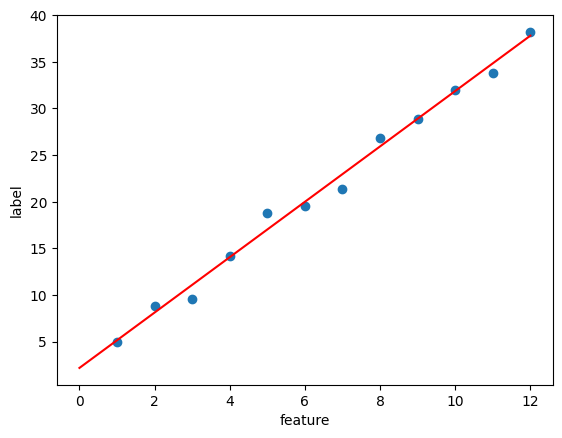

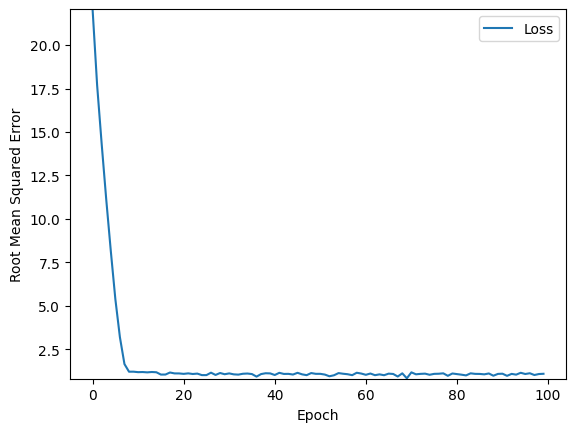

In [21]:
#@title Outra solução

learning_rate=0.05
epochs=100
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Resumo do ajuste de hiperparâmetros

A maioria dos problemas de aprendizado de máquina exige muitos ajustes de hiperparâmetros. Infelizmente, não podemos fornecer regras de ajuste concretas para todos os modelos. Reduzir a taxa de aprendizagem pode ajudar um modelo a convergir de forma eficiente, mas fazer com que outro modelo convirja muito lentamente. Você deve experimentar para encontrar o melhor conjunto de hiperparâmetros para seu conjunto de dados. Dito isto, aqui estão algumas regras básicas:

 * A perda de treinamento deve diminuir constantemente, de forma acentuada no início e depois mais lentamente até que a inclinação da curva atinja ou se aproxime de zero.
 *Se a perda de treinamento não convergir, treine por mais épocas.
 * Se a perda de treinamento diminuir muito lentamente, aumente a taxa de aprendizado. Observe que definir uma taxa de aprendizado muito alta também pode impedir a convergência da perda de treinamento.
 * Se a perda de treinamento variar muito (ou seja, a perda de treinamento for variável), diminua a taxa de aprendizado.
 * Reduzir a taxa de aprendizagem e aumentar o número de épocas ou o tamanho do lote costuma ser uma boa combinação.
 * Definir o tamanho do lote para um número de lote *muito* pequeno também pode causar instabilidade. Primeiro, experimente valores de tamanho de lote grandes. Em seguida, diminua o tamanho do lote até ver degradação.
 * Para conjuntos de dados do mundo real que consistem em um grande número de exemplos, o conjunto de dados inteiro pode não caber na memória. Nesses casos, você precisará reduzir o tamanho do lote para permitir que ele caiba na memória.

Lembre-se: a combinação ideal de hiperparâmetros depende dos dados, portanto você deve sempre experimentar e verificar.